In [1]:
import numpy as np
import pandas as pd
import os
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../mapillary_vistas_final_merged.csv')
df.shape

/home/nabeel/miniconda3/envs/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(28022, 34)

In [11]:
df = df[(df['final_shape'] == 'octagon-915.0')]
tgt_concat = []
dims_concat = []
for index, row in df.iterrows():
    if not pd.isna(row['points']):
        tgt = np.array(literal_eval(row['points']), dtype=np.float32)
    elif not pd.isna(row['tgt_polygon']):
        tgt = np.array(literal_eval(row['tgt_polygon']), dtype=np.float32)
    else:
        tgt = np.array(literal_eval(row['tgt']), dtype=np.float32)
    tgt_concat.append(tgt)
    dims_concat.append(np.array([max(tgt[:,0]) - min(tgt[:,0]), max(tgt[:,1]) - min(tgt[:,1])]))

tgt_concat = np.array(tgt_concat)
dims_concat = np.array(dims_concat)
tgt_concat.shape

(571, 4, 2)

In [90]:
# dims_concat[:, 1] = dims_concat[:, 1] / 736
# dims_concat[:, 0] = dims_concat[:, 0] / 1312
# # 736, 1312

<AxesSubplot:ylabel='Count'>

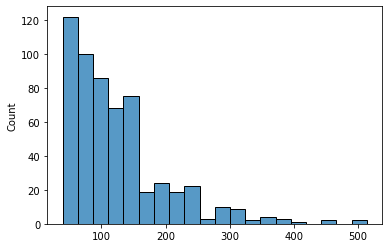

In [91]:
# sns.histplot(x=np.mean(dims_concat, axis=1), bins=np.arange(0, 550, 10))
sns.histplot(x=np.mean(dims_concat, axis=1), bins=20)


In [106]:
# hist, bin_edges = np.histogram(np.mean(dims_concat, axis=1), density=True)
hist, bin_edges = np.histogram(dims_concat[:, 1], density=True)
hist = hist/sum(hist)
hist

array([0.43782836, 0.34500875, 0.09807358, 0.06304727, 0.03502628,
       0.00875657, 0.00525394, 0.00525394, 0.        , 0.00175131])

In [107]:
bin_edges

array([ 39.166748,  99.86546 , 160.56418 , 221.26288 , 281.9616  ,
       342.6603  , 403.359   , 464.05774 , 524.7565  , 585.45514 ,
       646.1539  ], dtype=float32)

In [108]:
(bin_edges/736)

array([0.05321569, 0.13568677, 0.21815786, 0.3006289 , 0.3831    ,
       0.46557108, 0.5480421 , 0.63051325, 0.7129843 , 0.79545534,
       0.87792647], dtype=float32)

In [110]:
(127/960)

0.13229166666666667

In [109]:
(bin_edges/736) / (127/960)

array([0.40226036, 1.0256639 , 1.6490674 , 2.2724705 , 2.8958743 ,
       3.5192776 , 4.1426806 , 4.7660847 , 5.389488  , 6.012891  ,
       6.636295  ], dtype=float32)

In [98]:
127/960

0.13229166666666667

In [94]:
len(bin_edges)

11

In [83]:
sum(hist)

0.9999999999999999

In [84]:
len(bin_edges)


11

In [88]:
bin_edges
sign_sizes = []
for i in range(len(bin_edges)-1):
    size = (bin_edges[i] + bin_edges[i+1]) / 2
    sign_sizes.append(size/736)
sign_sizes

[0.08562783054683519,
 0.15007495880126953,
 0.2145220715066661,
 0.2789691842120627,
 0.3434163176495096,
 0.40786345108695654,
 0.4723105223282524,
 0.5367576764977496,
 0.601204830667247,
 0.6656519019085428]

In [13]:
tgt_concat.mean(axis=0)

array([[721.64374, 481.04257],
       [808.6293 , 517.68866],
       [776.50824, 608.90405],
       [688.87836, 571.9621 ]], dtype=float32)

In [6]:
df = df[(df['final_shape'] != 'circle-750.0') & (df['points'].isna()) & (df['final_shape'] != 'other-0.0-0.0') & (df['final_shape'] == 'octagon-915.0')]
df[df['filename_y'] == '8lkcFc59-2RgSU203mlYEQ.jpg']

,filename,object_id,shape,predicted_shape,predicted_class,group_x,batch_number,row,column,new_class,...,ymin_ratio,tgt_final,filename_y,h0,w0,h_ratio,w_ratio,w_pad,h_pad,tgt_polygon
27968,8lkcFc59-2RgSU203mlYEQ_93.png,93,octagon,other,other-0.0-0.0,3,0,1,e,10.0,...,0.37451,"[[318, 215], [374, 207], [386, 257], [330, 265]]",8lkcFc59-2RgSU203mlYEQ.jpg,1080,1920,0.666667,0.666667,16.0,8.0,NaN


In [37]:
df = pd.read_csv('../runs/results.csv')
df = df.replace({'apply_patch': 'True', 'random_patch': 'True'}, 1)
df = df.replace({'apply_patch': 'False', 'random_patch': 'False'}, 0)
df['apply_patch'] = df['apply_patch'].astype(float).astype(bool)
df['random_patch'] = df['random_patch'].astype(float).astype(bool)
df[['fnr_octagon', 'num_octagon_labels', 'num_octagon_with_patch', 'fn_octagon', 'apply_patch', 'random_patch']]

# 0. patch generated on synthetic dataset with resizing, applied on transformed signs with lighting
# 1. patch generated on synthetic dataset with resizing, applied on transformed signs with NO lighting
# 2. patch generated on synthetic dataset with NO resizing, applied on transformed signs with lighting
# 3. patch generated on synthetic dataset with NO resizing, applied on transformed signs with NO lighting
# 4. no patch

,fnr_octagon,num_octagon_labels,num_octagon_with_patch,fn_octagon,apply_patch,random_patch
0,0.206198,839.0,571.0,173.0,True,False
1,0.206198,839.0,571.0,173.0,True,False
2,0.206198,839.0,571.0,173.0,True,False
3,0.206198,839.0,571.0,173.0,True,False
4,0.000000,2.0,2.0,0.0,True,False
5,0.206198,839.0,571.0,173.0,True,False
6,0.206198,839.0,571.0,173.0,True,False
7,0.200000,5.0,3.0,1.0,True,False
8,0.200000,5.0,3.0,1.0,True,False
9,0.194030,839.0,571.0,163.0,True,False


In [38]:
(197.0 - 183) / 571

0.024518388791593695

In [39]:
df = pd.read_csv('../runs/results_per_image.csv')
assert(len(df[df['num_octagons'] < df['num_patches']]) == 0)
df.head(10)


,filename,num_octagons,num_patches,fnr,fn
0,bDtPvveUyz0PHka-ssj7ug.jpg,0,0.0,NaN,NaN
1,fgxUAUqeRCCLL4sH-tgC2A.jpg,0,0.0,NaN,NaN
2,X6ecNuJIbb7OXPtzsVJryA.jpg,0,0.0,NaN,NaN
3,36iNN_5lKC_CrOiFjmcF9w.jpg,1,0.0,0.0,0.0
4,4dJUlF0yIABNXB0WVh2cpg.jpg,0,0.0,NaN,NaN
5,0KohgmStOYkLZM6v-Frfew.jpg,0,0.0,NaN,NaN
6,82kED-EcvmG4Ptj98rcQug.jpg,0,0.0,NaN,NaN
7,j9GRbVPCNom2frhGSPB8Ow.jpg,0,0.0,NaN,NaN
8,pqVP5zno7C1ib8VxDlwF_Q.jpg,0,0.0,NaN,NaN
9,F3rQytc1LLTNo7Us-k7jog.jpg,0,0.0,NaN,NaN


In [40]:
df['fn'].unique()

array([nan,  0.,  1.,  2.])

In [41]:
np.sum(df['num_octagons'])

885

In [42]:
np.sum(df['num_patches'])

0.0

In [43]:
np.sum(df['fn'])

165.0

In [44]:
(184-165)/571

0.03327495621716287

In [14]:
octagon_df = df[df['num_octagons'] > 0]
octagon_df.shape


(773, 5)

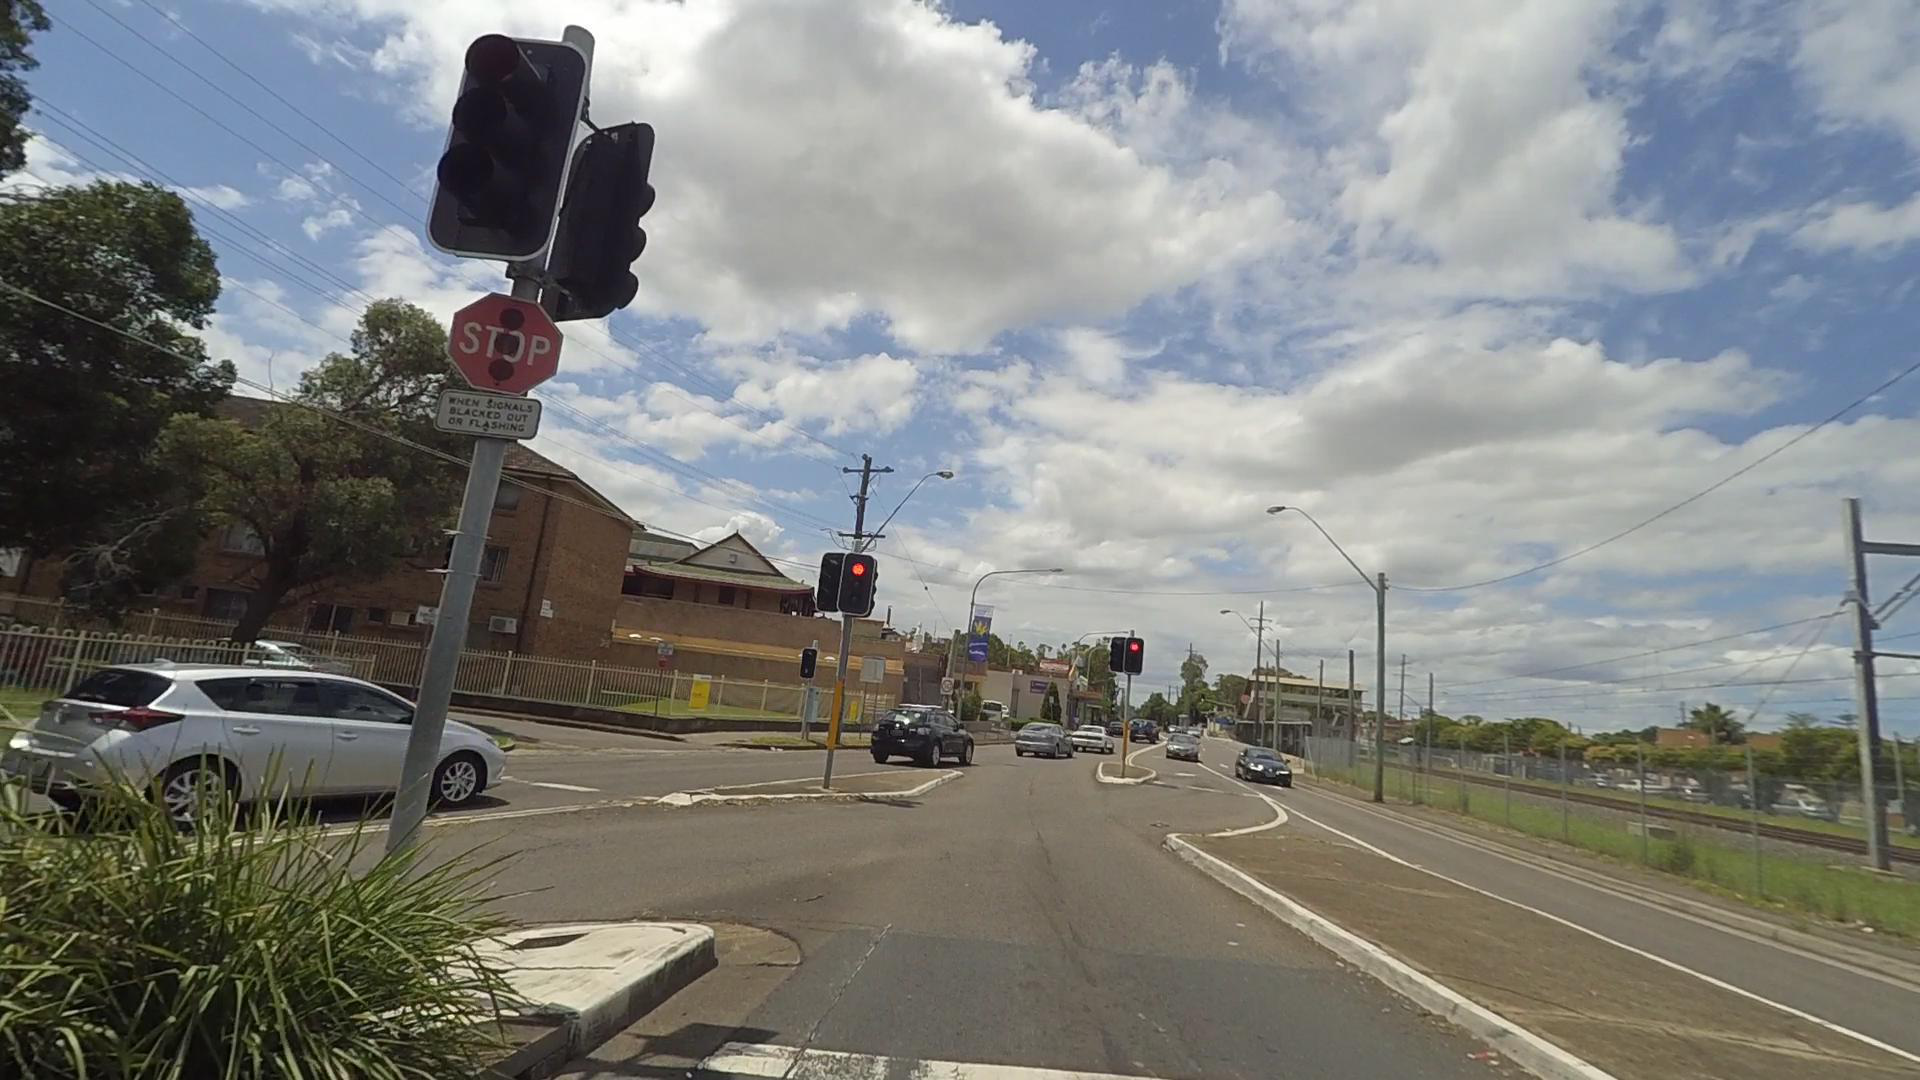

In [3]:
from PIL import Image
filename = '8lkcFc59-2RgSU203mlYEQ.jpg'
# filename = 'J-8nlLTMRhKGH1lokswIzQ.jpg'
im = Image.open(f'../../../../data/shared/mapillary_vistas/training/images/{filename}') 
im.show() 

In [ ]:
with open('../x_axis.npy', 'rb') as f:
    x_axis = np.load(f)
fig, ax = plt.subplots(1, 1, figsize=(8, 8), tight_layout=True)
with open('../runs/val/exp_mapillary_rp2_patch_0/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, label=f'Synthetic generated (small/bot, 50bg, lambda0.1)')
with open('../runs/val/exp_mapillary_rp2_patch_4/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, label=f'Our generated (small/bot, 10bg)')
with open('../runs/val/exp_mapillary_rp2_patch_7/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, label=f'Our generated (small/bot, 50bg)')
with open('../runs/val/exp_mapillary_rp2_patch_8/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, label=f'Our generated (small/bot, 50bg, lambda0.1)')
with open('../runs/val/exp_mapillary_rp2_patch_3/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, label=f'Our generated (big/mid)')
with open('../runs/val/exp_mapillary_rp2_patch_1/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, color='black', label=f'No patch')

# ax.plot(x_axis, fnr_array_no_patch, linewidth=1, label=f'no patch', linestyle='--')
ax.legend()
ax.set_xlabel('confidence')
ax.set_ylabel('fnr')

Text(0, 0.5, 'fnr')

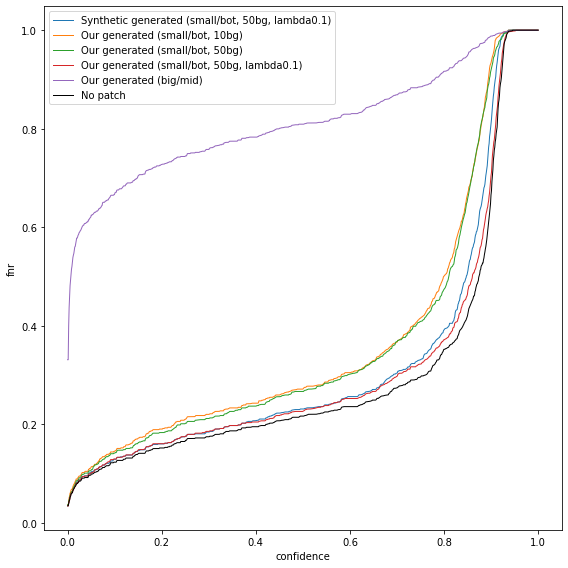

In [18]:
with open('../x_axis.npy', 'rb') as f:
    x_axis = np.load(f)
fig, ax = plt.subplots(1, 1, figsize=(8, 8), tight_layout=True)
with open('../runs/val/exp_mapillary_rp2_patch_0/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, label=f'Synthetic generated (small/bot, 50bg, lambda0.1)')
with open('../runs/val/exp_mapillary_rp2_patch_4/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, label=f'Our generated (small/bot, 10bg)')
with open('../runs/val/exp_mapillary_rp2_patch_7/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, label=f'Our generated (small/bot, 50bg)')
with open('../runs/val/exp_mapillary_rp2_patch_8/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, label=f'Our generated (small/bot, 50bg, lambda0.1)')
with open('../runs/val/exp_mapillary_rp2_patch_3/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, label=f'Our generated (big/mid)')
with open('../runs/val/exp_mapillary_rp2_patch_1/FNR_curve_octagon.npy', 'rb') as f:
    fnr = np.load(f)
ax.plot(x_axis, fnr, linewidth=1, color='black', label=f'No patch')

# ax.plot(x_axis, fnr_array_no_patch, linewidth=1, label=f'no patch', linestyle='--')
ax.legend()
ax.set_xlabel('confidence')
ax.set_ylabel('fnr')

In [13]:
success_rate = (164-160)/(571-0)
print('success rate with random patch', np.round(success_rate, 4))
success_rate = (172-160)/(571-0)
print('success rate with rp2 patch', np.round(success_rate, 4))


success rate with random patch 0.007
success rate with rp2 patch 0.021


In [8]:
pd.read_csv('../mapillary_vistas_final_merged.csv')

/home/nabeel/miniconda3/envs/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,filename,object_id,shape,predicted_shape,predicted_class,group_x,batch_number,row,column,new_class,...,ymin_ratio,tgt_final,filename_y,h0,w0,h_ratio,w_ratio,w_pad,h_pad,tgt_polygon
0,--NSVcUgfVhFd6uzkqHOOg_48.png,48,diamond,diamond,diamond-600.0,1,0,0,a,NaN,...,0.522794,"[[941.0980392156862, 558.3529411764705], [961....",--NSVcUgfVhFd6uzkqHOOg.jpg,2448,3264,0.392157,0.392157,16.0,16.0,NaN
1,--tczNya4_w5IhU9DeRMHw_33.png,33,diamond,diamond,diamond-915.0,1,0,0,b,NaN,...,0.362010,"[[248.94117647058803, 339.1372549019607], [305...",--tczNya4_w5IhU9DeRMHw.jpg,2448,3264,0.392157,0.392157,16.0,16.0,NaN
2,-0QdotcnWZMgDLHELjMeoQ_117.png,117,diamond,diamond,diamond-915.0,1,0,0,c,NaN,...,0.616176,"[[794.0392156862744, 695.2156862745097], [805....",-0QdotcnWZMgDLHELjMeoQ.jpg,2448,3264,0.392157,0.392157,16.0,16.0,NaN
3,-0QdotcnWZMgDLHELjMeoQ_50.png,50,diamond,diamond,diamond-915.0,1,0,0,d,NaN,...,0.594118,"[[531.6862745098036, 658.7450980392156], [546....",-0QdotcnWZMgDLHELjMeoQ.jpg,2448,3264,0.392157,0.392157,16.0,16.0,NaN
4,-2H8gOJp_LEvus2Y6pCIOA_101.png,101,diamond,diamond,diamond-915.0,1,0,0,e,NaN,...,0.363655,"[[1070.4578313253012, 310.6184738955823], [109...",-2H8gOJp_LEvus2Y6pCIOA.jpg,2988,3984,0.321285,0.321285,16.0,16.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,C9Cy-eUHARvbuSxTSrnhjA_155.png,155,triangle,circle,circle-750.0,2,0,0,b,NaN,...,0.432470,"[[965.0, 1543.75], [995.0, 1510.0], [1011.25, ...",C9Cy-eUHARvbuSxTSrnhjA.jpg,3936,5248,0.243902,0.243902,16.0,16.0,NaN
28018,Ka1tPXdxFv6sIJTRSst1ew_143.png,143,triangle,circle,circle-750.0,2,0,0,d,1.0,...,0.535049,"[[826, 417], [835, 430], [815, 433]]",Ka1tPXdxFv6sIJTRSst1ew.jpg,2160,3840,0.333333,0.333333,16.0,8.0,NaN
28019,cjm34RdPXo5C0UJ4IuFibg_54.png,54,triangle,circle,circle-750.0,2,0,1,d,NaN,...,0.424265,"[[577.1428571428571, 912.8571428571428], [599....",cjm34RdPXo5C0UJ4IuFibg.jpg,2448,3264,0.392157,0.392157,16.0,16.0,NaN
28020,Y2_AjNDiZPFRKv205TvqmA_36.png,36,octagon,octagon,octagon-915.0,1,0,0,a,NaN,...,0.520833,"[[883.8431372549019, 554.0392156862745], [931....",Y2_AjNDiZPFRKv205TvqmA.jpg,2448,3264,0.392157,0.392157,16.0,16.0,NaN


In [75]:
# directory = '/data/shared/mtsd_v2_fully_annotated/cropped_signs_v6/train'
# print(os.listdir(directory))
# for label in range(0, 12):
#     count = 0
#     for filename in os.listdir(os.path.join(directory, str(label))):
#         if filename.endswith(".jpg") or filename.endswith(".png"):
#             count += 1
#     print(label, count)


In [76]:
#mapillary vistas 

# model 1
# mv_df = pd.read_csv('../mapillaryvistas_model_3_no_background.csv')
# mv_df = pd.read_csv('../mapillaryvistas_model_3_no_background__.csv')
# mv_df = pd.read_csv('../mapillaryvistas_model_3.csv')
# mv_df = pd.read_csv('../mapillaryvistas_model_3_updated.csv')
mv_df = pd.read_csv('../mapillaryvistas_model_3_updated_optimized.csv')


# model 2
# mv_df = pd.read_csv('../mapillaryvistas_model_2.csv')

# mv_df = pd.read_csv('../mapillaryvistas_model_2_no_background.csv')

# only circles and triangles on rects
# mv_df = pd.read_csv('../mapillaryvistas_model_2_no_background_strict.csv')

# any shape except diamond on rects
# mv_df = pd.read_csv('../mapillaryvistas_model_2_no_background_strict_diamond.csv')

mv_df

,filename,object_id,shape,predicted_shape,predicted_class,group,batch_number,row,column
0,--NSVcUgfVhFd6uzkqHOOg_48.png,48,diamond,diamond,diamond-600.0,1,0,0,a
1,--tczNya4_w5IhU9DeRMHw_33.png,33,diamond,diamond,diamond-915.0,1,0,0,b
2,-0QdotcnWZMgDLHELjMeoQ_117.png,117,diamond,diamond,diamond-915.0,1,0,0,c
3,-0QdotcnWZMgDLHELjMeoQ_50.png,50,diamond,diamond,diamond-915.0,1,0,0,d
4,-2H8gOJp_LEvus2Y6pCIOA_101.png,101,diamond,diamond,diamond-915.0,1,0,0,e
...,...,...,...,...,...,...,...,...,...
28399,pUXCSbq7nUO1Cx4y4YZl_Q_74.png,74,triangle,octagon,octagon-915.0,2,0,2,b
28400,qBy_nd5G6qZiFDuZrNfGrA_30.png,30,triangle,diamond,diamond-915.0,2,0,2,c
28401,Y2_AjNDiZPFRKv205TvqmA_36.png,36,octagon,octagon,octagon-915.0,1,0,0,a
28402,eDLXGB6vYtAyV71JIv6JdQ_58.png,58,octagon,octagon,octagon-915.0,1,0,0,b


In [77]:
len(mv_df['filename'].unique())

28404

In [78]:
mv_df['group'].value_counts()

3    16800
1    10307
2     1297
Name: group, dtype: int64

In [79]:
mv_df['group'].value_counts()/len(mv_df)

3    0.591466
1    0.362871
2    0.045663
Name: group, dtype: float64

In [80]:
grouped_df = mv_df.groupby(by=['shape', 'predicted_shape', 'group']).count()
grouped_df = grouped_df.reset_index()
grouped_df[grouped_df['group'] == 1][['shape', 'predicted_shape', 'group', 'filename']].rename({'filename':'count'}, axis=1)

,shape,predicted_shape,group,count
0,circle,circle,1,5049
9,diamond,diamond,1,1244
18,octagon,octagon,1,3
31,pentagon,pentagon,1,84
36,rect,circle,1,903
37,rect,diamond,1,23
38,rect,octagon,1,20
40,rect,pentagon,1,3
41,rect,rect,1,1160
42,rect,square,1,657


In [81]:
grouped_df = mv_df.groupby(by=['shape', 'predicted_shape', 'group']).count()
grouped_df = grouped_df.reset_index()
grouped_df[grouped_df['group'] == 2][['shape', 'predicted_shape', 'group', 'filename']].rename({'filename':'count'}, axis=1)

,shape,predicted_shape,group,count
1,circle,diamond,2,9
2,circle,octagon,2,508
3,circle,pentagon,2,1
4,circle,rect,2,18
5,circle,square,2,235
6,circle,triangle,2,2
7,circle,triangle_inverted,2,8
8,diamond,circle,2,18
10,diamond,octagon,2,1
12,diamond,pentagon,2,1


In [82]:
grouped_df = mv_df.groupby(by=['shape', 'predicted_shape', 'group']).count()
grouped_df = grouped_df.reset_index()
grouped_df[grouped_df['group'] == 3][['shape', 'predicted_shape', 'group', 'filename']].rename({'filename':'count'}, axis=1)

,shape,predicted_shape,group,count
11,diamond,other,3,433
19,octagon,other,3,56
23,other,other,3,588
30,pentagon,other,3,751
39,rect,other,3,14723
48,triangle,other,3,149
52,triangle_inverted,other,3,100


In [83]:
# contour detector
mv_df['shape'].value_counts()

rect                 17612
circle                5830
diamond               1726
pentagon              1102
other                  769
triangle_inverted      715
triangle               587
octagon                 63
Name: shape, dtype: int64

In [84]:
# resnet
mv_df['predicted_class'].value_counts().sort_values(ascending=False)

other-0.0-0.0               16800
circle-750.0                 6245
diamond-915.0                1155
square-600.0                  899
triangle_inverted-1220.0      718
octagon-915.0                 574
rect-458.0-610.0              495
triangle-900.0                491
rect-762.0-915.0              472
rect-915.0-1220.0             237
diamond-600.0                 227
pentagon-915.0                 91
Name: predicted_class, dtype: int64